Skin detection is an application which detects skin part from images.The application basically creates a mask for the range of skin color which is then inputed in the 'bitwise And' function withthe original image.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import imutils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #For image processing
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
print(os.listdir("../input/skin-detect"))

# Any results you write to the current directory are saved as output.

['skin_detection.jpeg.jpeg']


In [2]:
# Upper and lower range of HSV All the pixels within this range are considered 
lower=np.array([0,48,80],dtype="uint8")
upper=np.array([20,255,255],dtype="uint8")

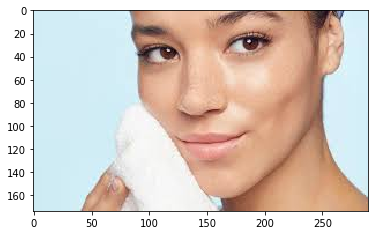

SKIN


In [3]:

source=cv2.imread("../input/skin-detect/skin_detection.jpeg.jpeg")
# Images are read by opencv in BGR format cvtcolor is used to convrt it in RGB 
source=cv2.cvtColor(source,cv2.COLOR_BGR2RGB)
plt.imshow(source)
plt.show()
print("SOURCE")

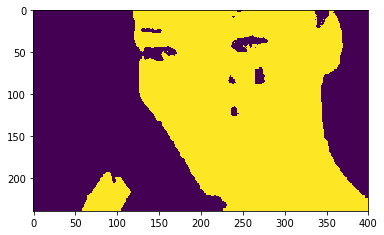

SKIN MASK


In [8]:

# Resizing the frame, converting RGB(Red,Green,Blue) to HSV(Hue,Saturation,Value).The HSV
# model describes colors similarly to how the human eye tends to perceive color.RGB defines
# color in terms of a combination of primary colors, where as, HSV describes color using more
# familiar comparisons such as color, vibrancy and brightness.inrange function is applid to image 
# with range the pixels within the range are non black and everything else is black.
frame=imutils.resize(source,width=400)
hsv=cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
skinmask=cv2.inRange(hsv,lower,upper)
plt.imshow(skinmask)
plt.show()
print("SKIN MASK")



In [5]:
# getStructuringElement provides an kernel(filter) of 11x11 which is used in erode and dilate function.
# erode basically removes foreground boundaries from images,The kernel slides through the image (as in 2D convolution). A pixel in the original imagee 
# (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
# Dilate as the name suggest increases the white portion of mask.
# more information:"https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html"
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
erode=cv2.erode(skinmask,kernel,iterations=2)
dilate=cv2.dilate(skinmask,kernel,iterations=2)

In [6]:
# Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. 
# It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred
# Gaussian blur is gaussian filter which is convolved over the image
skinmask=cv2.GaussianBlur(skinmask,(3,3),0)
skin=cv2.bitwise_and(frame,frame,mask=skinmask)

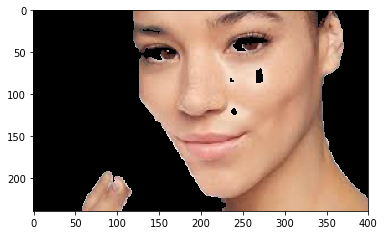

SKIN


In [7]:
plt.imshow(skin)
plt.show()
print("SKIN")